# **赛题及数据说明**

赛题以预测二手车的交易价格为任务，数据集报名后可见并可下载，该数据来自某交易平台的二手车交易记录，总数据量超过40w，包含31列变量信息，其中15列为匿名变量。
为了保证比赛的公平性，将会从中抽取15万条作为训练集，5万条作为测试集A，5万条作为测试集B，同时会对name、model、brand和regionCode等信息进行脱敏。

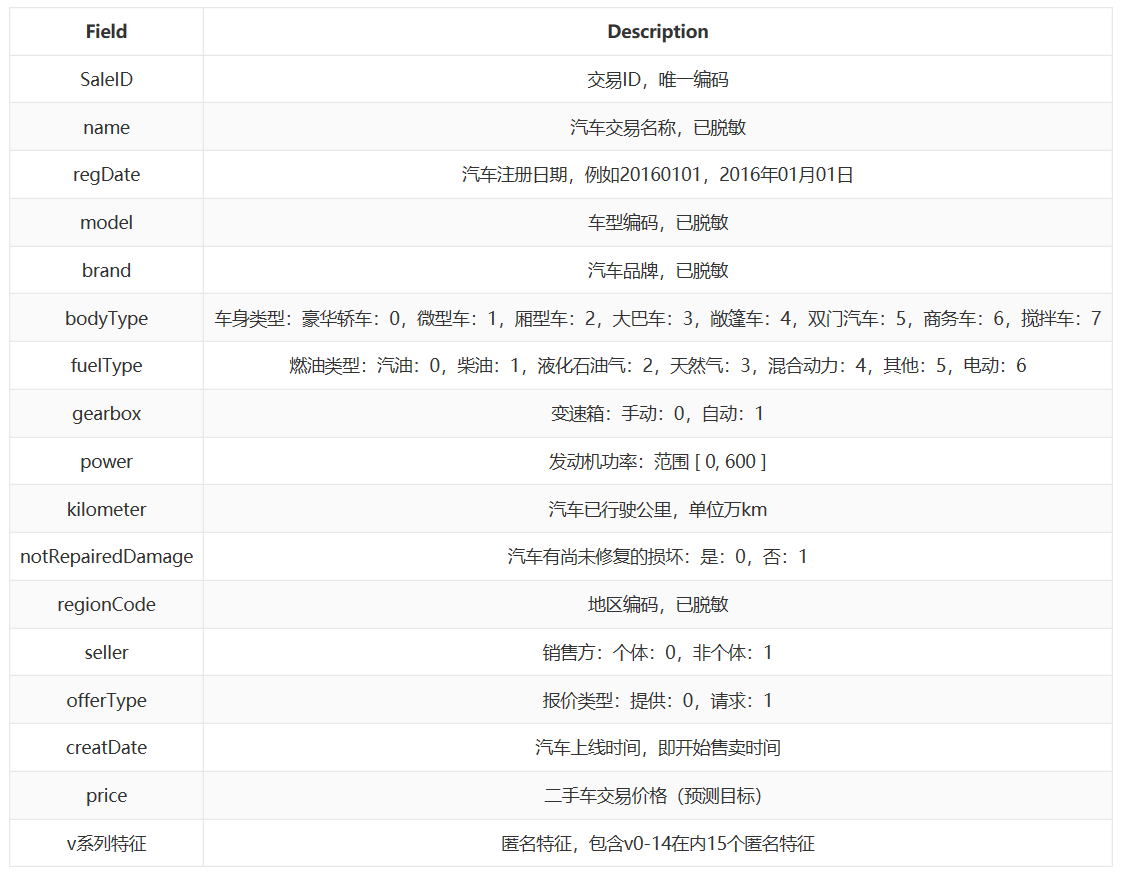

In [18]:
from IPython.display import Image
Image(filename = '字段表.png', width=700, height=1000)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
# 加载数据
train_0 = pd.read_csv('used_car_train_20200313.csv', sep=' ', encoding='utf-8', engine='python')
test_0 = pd.read_csv('used_car_testB_20200421.csv', sep=' ', encoding='utf-8', engine='python')
train = train_0.copy()
test = test_0.copy()

In [21]:
train.head(5).T

,0,1,2,3,4
SaleID,0,1,2,3,4
name,736,2262,14874,71865,111080
regDate,20040402,20030301,20040403,19960908,20120103
model,30,40,115,109,110
brand,6,1,15,10,5
bodyType,1,2,1,0,1
fuelType,0,0,0,0,0
gearbox,0,0,0,1,0
power,60,0,163,193,68
kilometer,12.5,15,12.5,15,5


In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


# **EDA+数据预处理**

#### **预测值分布** 

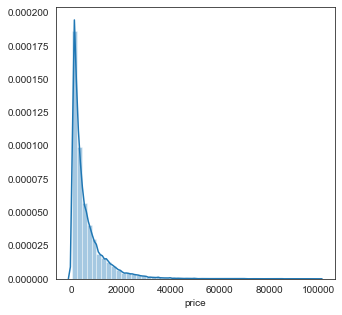

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_style('white')
sns.distplot(train['price'])

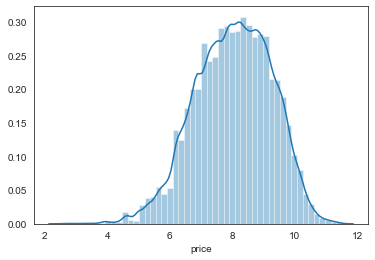

In [24]:
# 长尾分布——对数化
train['price'] = np.log1p(train['price'])
sns.distplot(train['price'])

#### **合并训练集与测试集**

In [25]:
all_data = pd.concat([train, test], ignore_index=True)

#### **特征初步分析**

In [26]:
# ID及名称特征
id_features = ['SaleID', 'name']
all_data.drop(id_features, axis=1, inplace=True)
# 分类特征
class_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType']
# 数值特征
num_features = ['power', 'kilometer', 
                'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
# 时间特征
time_features = ['regDate', 'creatDate']
# 空间特征
space_features = ['regionCode']

#### **异常值**

##### 根据数据类型分析

In [27]:
all_data.dtypes

regDate                int64
model                float64
brand                  int64
bodyType             float64
fuelType             float64
gearbox              float64
power                  int64
kilometer            float64
notRepairedDamage     object
regionCode             int64
seller                 int64
offerType              int64
creatDate              int64
price                float64
v_0                  float64
v_1                  float64
v_2                  float64
v_3                  float64
v_4                  float64
v_5                  float64
v_6                  float64
v_7                  float64
v_8                  float64
v_9                  float64
v_10                 float64
v_11                 float64
v_12                 float64
v_13                 float64
v_14                 float64
dtype: object

In [28]:
all_data.dtypes[all_data.dtypes == 'object']

notRepairedDamage    object
dtype: object

In [29]:
all_data['notRepairedDamage'].value_counts()

0.0    148585
-       32393
1.0     19022
Name: notRepairedDamage, dtype: int64

In [30]:
all_data['notRepairedDamage'].replace('-', pd.NA, inplace=True)

##### 根据经验分析

In [32]:
# 发动机功率范围：[0-600]
all_data['power'] = all_data['power'].map(lambda x: 600 if x>600 else x)

#### **缺失值**

In [33]:
null_features = all_data.isnull().sum().sort_values(ascending=False)
null_features

price                50000
notRepairedDamage    32393
fuelType             11604
gearbox               7949
bodyType              6010
model                    1
v_14                     0
brand                    0
power                    0
kilometer                0
regionCode               0
seller                   0
offerType                0
creatDate                0
v_0                      0
v_13                     0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
regDate                  0
dtype: int64

In [34]:
null_features = list(null_features[null_features != 0].index)
null_features.remove('price')
print(null_features)

['notRepairedDamage', 'fuelType', 'gearbox', 'bodyType', 'model']


In [35]:
# 中位数填充缺失值
x = all_data[null_features].copy()
for f in null_features:
    x[f].fillna(x[f].median(), inplace=True)

In [36]:
all_data[null_features] = x

# **特征工程**

#### **时间特征**

In [37]:
from datetime import datetime

In [38]:
# 时间数据类型转换及异常值处理
# 部分数据月份为'00'，需进行处理
def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:])
    if month < 1:
        month = 1
    date = datetime(year, month, day)
    return date

In [39]:
all_data['regDate'] = all_data['regDate'].apply(date_process)

In [40]:
all_data['creatDate'] = all_data['creatDate'].apply(date_process)

In [41]:
# 构造新的时间特征——汽车注册及二手车交易订单创建的年份、月份、日期
all_data['regDate_year'] = all_data['regDate'].dt.year
all_data['regDate_month'] = all_data['regDate'].dt.month
all_data['regDate_day'] = all_data['regDate'].dt.day
all_data['creatDate_year'] = all_data['creatDate'].dt.year
all_data['creatDate_month'] = all_data['creatDate'].dt.month
all_data['creatDate_day'] = all_data['creatDate'].dt.day

In [42]:
# 构造新的时间特征——汽车使用时间（年、月、日）
all_data['used_time_year'] = round((all_data['creatDate'] - all_data['regDate']).dt.days/365, 1)
all_data['used_time_month'] = round((all_data['creatDate'] - all_data['regDate']).dt.days/365*12, 1)
all_data['used_time_day'] = (all_data['creatDate'] - all_data['regDate']).dt.days

In [43]:
# 删除原始时间特征
all_data.drop(time_features, axis=1, inplace=True)

In [44]:
# 更新时间特征列表
time_features.clear()
time_features.extend(['regDate_year', 'regDate_month', 'regDate_day',
                      'creatDate_year', 'creatDate_month', 'creatDate_day',
                      'used_time_year', 'used_time_month', 'used_time_day'])
print(time_features)

['regDate_year', 'regDate_month', 'regDate_day', 'creatDate_year', 'creatDate_month', 'creatDate_day', 'used_time_year', 'used_time_month', 'used_time_day']


#### **数值特征**

数据分桶

In [45]:
# 汽车行驶里程已分桶
all_data['kilometer'].value_counts().sort_index()

0.5       2441
1.0        986
2.0       3122
3.0       3339
4.0       3610
5.0       4254
6.0       4951
7.0       5469
8.0       6103
9.0       6941
10.0      8629
12.5     21035
15.0    129120
Name: kilometer, dtype: int64

In [46]:
# 对发动机功率进行分桶
all_data['power'].value_counts().sort_index()

0      17219
1         10
2          5
3          3
4         13
       ...  
583        1
584        1
585        5
587        1
600      201
Name: power, Length: 458, dtype: int64

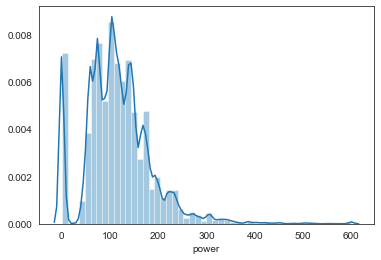

In [47]:
sns.distplot(all_data['power'])

In [48]:
bins = [-1] + list(range(10, 301, 10)) + [600]

In [49]:
all_data['power_bin'] = pd.cut(all_data['power'], bins, labels=False)

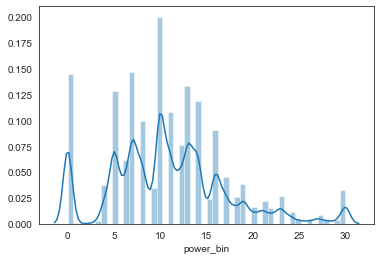

In [50]:
sns.distplot(all_data['power_bin'])

In [51]:
# 更新数值特征及分类特征列表
num_features.remove('kilometer')
class_features.append('kilometer')
class_features.append('power_bin')

In [52]:
print(num_features)
print(class_features)

['power', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType', 'kilometer', 'power_bin']


#### **分类特征**

In [53]:
all_data[class_features].nunique().sort_values(ascending=False)

model                248
brand                 40
power_bin             31
kilometer             13
bodyType               8
fuelType               7
notRepairedDamage      3
seller                 2
gearbox                2
offerType              1
dtype: int64

In [54]:
# 对类别较少的特征进行处理
all_data['gearbox'].value_counts()

0.0    156703
1.0     43297
Name: gearbox, dtype: int64

In [55]:
all_data['seller'].value_counts()

0    199999
1         1
Name: seller, dtype: int64

In [56]:
# offertype特征只有一类，故删除
# seller特征偏斜极其严重，故删除
all_data.drop(['offerType', 'seller'], axis=1, inplace=True)

In [57]:
# 更新分类特征列表
class_features.remove('offerType')
class_features.remove('seller')
print(class_features)

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'kilometer', 'power_bin']


In [58]:
# 特征交叉
for f in class_features:
    train_gb = all_data.iloc[:train_0.shape[0], :].groupby(f)
    all_info = {}
    for c, c_data in train_gb:
        info = {}
        info[f + '_amount'] = len(c_data)
        info[f + '_price_max'] = c_data.price.max()
        info[f + '_price_median'] = c_data.price.median()
        info[f + '_price_min'] = c_data.price.min()
        info[f + '_price_sum'] = c_data.price.sum()
        info[f + '_price_std'] = c_data.price.std()
        info[f + '_price_mean'] = c_data.price.mean()
        all_info[c] = info
    all_info_df = pd.DataFrame(all_info).T.reset_index().rename(columns={'index': f})
    all_data = all_data.merge(all_info_df, how='left', on=f)

#### **特征总结**

In [59]:
features = all_data.columns.to_list()
features.remove('price')
print(features)

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'regDate_year', 'regDate_month', 'regDate_day', 'creatDate_year', 'creatDate_month', 'creatDate_day', 'used_time_year', 'used_time_month', 'used_time_day', 'power_bin', 'model_amount', 'model_price_max', 'model_price_median', 'model_price_min', 'model_price_sum', 'model_price_std', 'model_price_mean', 'brand_amount', 'brand_price_max', 'brand_price_median', 'brand_price_min', 'brand_price_sum', 'brand_price_std', 'brand_price_mean', 'bodyType_amount', 'bodyType_price_max', 'bodyType_price_median', 'bodyType_price_min', 'bodyType_price_sum', 'bodyType_price_std', 'bodyType_price_mean', 'fuelType_amount', 'fuelType_price_max', 'fuelType_price_median', 'fuelType_price_min', 'fuelType_price_sum', 'fuelType_price_std', 'fuelType_price_mean', 'gearbox_amount', 'gearbox_price

#### **数据集重建**

In [47]:
train = all_data.iloc[:train_0.shape[0], :]
test = all_data.iloc[train_0.shape[0]:, :]

In [61]:
train.to_csv('train.csv', sep=' ', index=False)
test.to_csv('test.csv', sep=' ', index=False)